<a href="https://colab.research.google.com/github/CP4-IOT/CP4_AnaliseDeDados/blob/main/CP4__IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Dataset Individual Household Electric Power Consumption

Este notebook contém as respostas para as questões do CP 01 de IoT sobre Análise de Dados de Consumidores de Energia.

In [3]:
# 1. Carregue o dataset e exiba as 10 primeiras linhas.
# Bibliotecas necessárias
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = "household_power_consumption.txt"
df = pd.read_csv(filename, sep=';', low_memory=False)

# Mostrar as 10 primeiras linhas
df.head(10)


Saving household_power_consumption.txt to household_power_consumption (2).txt


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

- **Global_active_power:** energia ativa consumida pela residência, efetivamente usada para realizar trabalho (aparelhos elétricos, iluminação).
- **Global_reactive_power:** energia reativa, usada para manter campos eletromagnéticos em equipamentos, sem realizar trabalho útil diretamente.


## 3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [4]:
# 3. Verifique se existem valores ausentes no dataset. Quantifique-os.
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)


Valores ausentes por coluna:
 Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


## 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [5]:
# 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['DayOfWeek'] = df['Date'].dt.day_name()
print(df.head(3))


        Date      Time Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00               4.216                 0.418  234.840   
1 2006-12-16  17:25:00               5.360                 0.436  233.630   
2 2006-12-16  17:26:00               5.374                 0.498  233.290   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3 DayOfWeek  
0           18.400          0.000          1.000            17.0  Saturday  
1           23.000          0.000          1.000            16.0  Saturday  
2           23.000          0.000          2.000            17.0  Saturday  


## 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [7]:
# 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]
mean_daily_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
print(mean_daily_power_2007.head())


Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


## 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

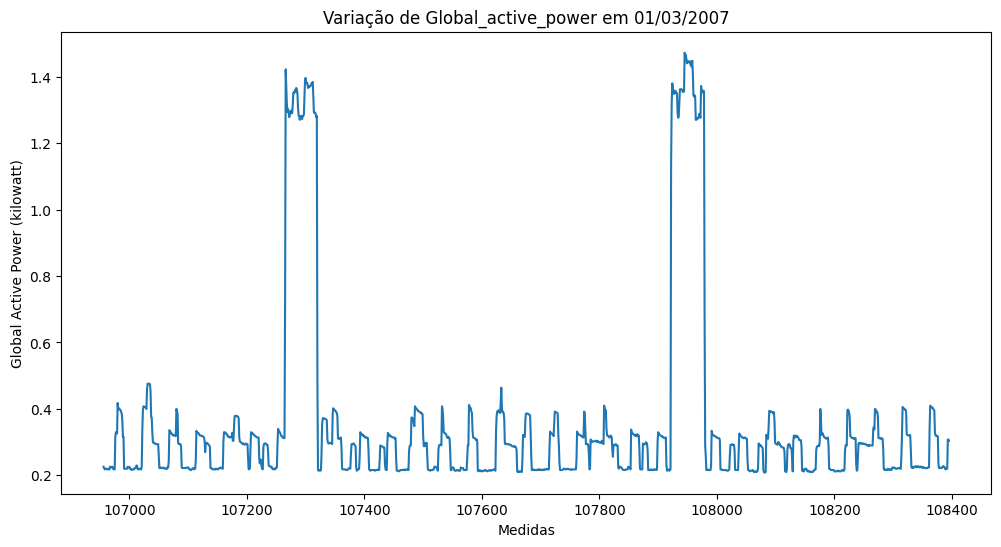

In [8]:
# 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.
import matplotlib.pyplot as plt

# Variação de Global_active_power em 01/03/2007
single_day = df[df['Date'] == '2007-03-01']

plt.figure(figsize=(12,6))
plt.plot(single_day['Global_active_power'])
plt.title('Variação de Global_active_power em 01/03/2007')
plt.xlabel('Medidas')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


## 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

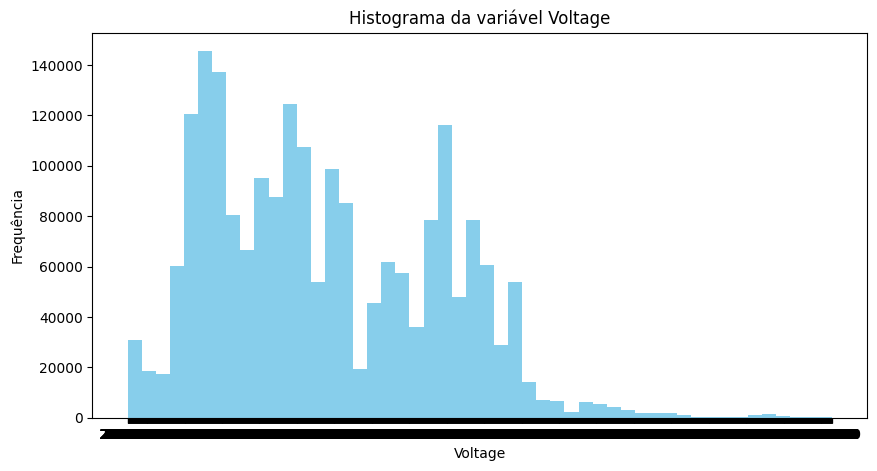

In [9]:
# 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?
plt.figure(figsize=(10,5))
plt.hist(df['Voltage'].dropna(), bins=50, color='skyblue')
plt.title('Histograma da variável Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequência')
plt.show()

#O histograma da variável Voltage mostra que a maioria das medições está concentrada em torno de um valor central,
# com uma distribuição que aparenta ser aproximadamente simétrica, indicando pouca variação extrema.

## 8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [10]:
# 8. Calcule o consumo médio por mês em todo o período disponível no dataset.
df['MonthYear'] = df['Date'].dt.to_period('M')
mean_monthly_power = df.groupby('MonthYear')['Global_active_power'].mean()
print(mean_monthly_power.head())


MonthYear
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
Freq: M, Name: Global_active_power, dtype: float64


## 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [11]:
# 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).
daily_power = df.groupby('Date')['Global_active_power'].sum()
max_power_day = daily_power.idxmax()
max_power_value = daily_power.max()
print(f'Dia com maior consumo: {max_power_day}, Consumo: {max_power_value}')


Dia com maior consumo: 2006-12-23 00:00:00, Consumo: 4773.386


## 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [12]:
# 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
mean_weekday_power = df[df['IsWeekend'] == False]['Global_active_power'].mean()
mean_weekend_power = df[df['IsWeekend'] == True]['Global_active_power'].mean()

print(f'Consumo médio dias de semana: {mean_weekday_power}')
print(f'Consumo médio finais de semana: {mean_weekend_power}')


Consumo médio dias de semana: 1.0354720516747498
Consumo médio finais de semana: 1.2342321767913047


## 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [14]:
# 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
correlation = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
display(correlation)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


## 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [16]:
# 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['Total_Sub_metering'] = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum(axis=1)
print(df.head(3))


        Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3 DayOfWeek  \
0              18.4             0.0             1.0            17.0  Saturday   
1              23.0             0.0             1.0            16.0  Saturday   
2              23.0             0.0             2.0            17.0  Saturday   

  MonthYear  IsWeekend  Total_Sub_metering  
0   2006-12       True                18.0  
1   2006-12       True                17.0  
2   2006-12       True                19.0  


## 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [17]:
# 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.
monthly_sub_metering = df.groupby(df['Date'].dt.to_period('M'))['Total_Sub_metering'].mean()
monthly_global_active = df.groupby(df['Date'].dt.to_period('M'))['Global_active_power'].mean()

months_exceeding = monthly_sub_metering[monthly_sub_metering > monthly_global_active]
print(months_exceeding)


Date
2006-12    10.871204
2007-01    10.423051
2007-02     9.485665
2007-03    10.212634
2007-04     6.249954
2007-05     8.452442
2007-06     7.371806
2007-07     5.681004
2007-08     6.975896
2007-09     8.205856
2007-10     8.674104
2007-11     9.818958
2007-12    11.636290
2008-01     9.785999
2008-02     8.447222
2008-03     9.454682
2008-04     9.574745
2008-05     9.019064
2008-06     9.775000
2008-07     7.145094
2008-08     2.370116
2008-09     8.825185
2008-10     8.584409
2008-11     9.133542
2008-12     8.779391
2009-01    10.690166
2009-02     9.770536
2009-03     9.896259
2009-04     9.605255
2009-05     9.066241
2009-06     7.433611
2009-07     5.571013
2009-08     5.920789
2009-09     9.127153
2009-10     9.766174
2009-11    10.403866
2009-12    11.093190
2010-01    11.343369
2010-02    12.762202
2010-03     9.415614
2010-04     9.508403
2010-05    10.419086
2010-06     9.730463
2010-07     5.486962
2010-08     4.472917
2010-09     7.574861
2010-10     9.500179
2010-11 